**Table of contents**<a id='toc0_'></a>    
- [Table of Contents](#toc1_)    
- [Prepare the notebook](#toc2_)    
  - [Import necessary libraries](#toc2_1_)    
  - [Import the datasets](#toc2_2_)    
- [Task 1: Data understanding](#toc3_)    
  - [Assessing Data Quality](#toc3_1_)    
    - [Verify the datatypes make intuitive sense](#toc3_1_1_)    
    - [Check for missing values](#toc3_1_2_)    
    - [Check for possible placeholder values](#toc3_1_3_)    
    - [Check for duplicates](#toc3_1_4_)    
    - [Check for races with more than one road type (cobble, tarmac, gravel)](#toc3_1_5_)    
    - [TODO: Check for Inconsistent Values in Categorical Columns?](#toc3_1_6_)    
    - [Check Numeric Ranges](#toc3_1_7_)    
  - [Data Distribution](#toc3_2_)    
    - [Identify outliers using IQR](#toc3_2_1_)    
    - [Histograms](#toc3_2_2_)    
- [Task 2: Data Transformation](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Prepare the notebook](#toc0_)

## <a id='toc2_1_'></a>[Import necessary libraries](#toc0_)

In [31]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <a id='toc2_2_'></a>[Import the datasets](#toc0_)

In [ ]:
# Load the dataset
df_races = pd.read_csv('dataset/races.csv')
df_cyclists = pd.read_csv('dataset/cyclists.csv')

# <a id='toc3_'></a>[Task 1: Data understanding](#toc0_)

## <a id='toc3_1_'></a>[Assessing Data Quality](#toc0_)

### <a id='toc3_1_1_'></a>[Verify the datatypes make intuitive sense](#toc0_)

We'll start by making sure the datatypes make intuitive sense with the data we're seeing. This allows us to catch obvious logical mistakes, such as a numeric value (e.g height or weight) stored as a string.

In [34]:
df_races.dtypes

_url                    object
name                    object
points                 float64
uci_points             float64
length                 float64
climb_total            float64
profile                float64
startlist_quality        int64
average_temperature    float64
date                    object
position                 int64
cyclist                 object
cyclist_age            float64
is_tarmac                 bool
is_cobbled                bool
is_gravel                 bool
cyclist_team            object
delta                  float64
dtype: object

The datatypes seem to make sense for these columns. This is my understanding of what each column represents:

| Column               | Description                                                                                     | Data Type    |
|----------------------|-------------------------------------------------------------------------------------------------|--------------|
| _url                 | The URL of the stage.                                                                           | object       |
| name                 | The name of the event or race.                                                                  | object       |
| points               | Points awarded to cyclists for the... stage?                                                    | float64      |
| uci_points           | UCI points awarded for the... stage?                                                            | float64      |
| length               | The total length the race stage in meters.                                                      | float64      |
| climb_total          | The total elevation climbed in the stage in meters.                                             | float64      |
| profile              | The terrain profile of the stage? Seems encoded in some magic numeric value                     | float64      |
| startlist_quality    | A numeric value representing the quality of the riders at the start of the stage                | float64      |
| average_temperature  | The average temperature during the stage.                                                       | float64      |
| date                 | The date and time when the race stage occurred.                                                 | object       |
| position             | The final position of the cyclist in the race stage.                                            | int64        |
| cyclist              | The name of the cyclist competing in the race stage.                                            | object       |
| cyclist_age          | The age of the cyclist at the time of the race stage.                                           | float64      |
| is_tarmac            | True if race was on tarmac.                                                                     | bool         |
| is_cobbled           | True if race was on cobblestone.                                                                | bool         |
| is_gravel            | True if race was on gravel.                                                                     | bool         |
| cyclist_team         | The name of the cyclist's team.                                                                 | object       |
| delta                | Time difference between the cyclist and the winner of the stage, in seconds.                    | float64      |


In [35]:
df_cyclists.dtypes

_url            object
name            object
birth_year     float64
weight         float64
height         float64
nationality     object
dtype: object

| Column       | Description                                                      | Data Type |
|--------------|------------------------------------------------------------------|-----------|
| _url         | The URL or of the cyclist                                        | object    |
| name         | The full name of the cyclist.                                    | object    |
| birth_year   | The birth year of the cyclist.                                   | float64   |
| weight       | The weight of the cyclist in kilograms.                          | float64   |
| height       | The height of the cyclist in meters.                             | float64   |
| nationality  | The nationality of the cyclist.                                  | object    |

### <a id='toc3_1_2_'></a>[Check for missing values](#toc0_)

In [36]:
# Check for missing values in each column
missing_values = df_races.isna().sum()

# Display the result
print(missing_values)

_url                        0
name                        0
points                    477
uci_points             338779
length                      0
climb_total            147045
profile                148194
startlist_quality           0
average_temperature    559932
date                        0
position                    0
cyclist                     0
cyclist_age               113
is_tarmac                   0
is_cobbled                  0
is_gravel                   0
cyclist_team           159161
delta                       0
dtype: int64


In [ ]:
# Check for missing values in each column
missing_values = df_cyclists.isna().sum()

# Display the result
print(missing_values)

_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64


### <a id='toc3_1_3_'></a>[Check for possible placeholder values](#toc0_)

In [ ]:
# List of potential "placeholders"
unknown_values = ["unknown", "N/A", "none", "missing", "na", "null", "", "other"]

# Check each column for occurrences of these values (case-insensitive)
unknown_counts = df_races.apply(lambda col: col.astype(str).str.lower().isin(unknown_values).sum())

# Display the counts of "placeholder" values for each column
print(unknown_counts)

_url                   0
name                   0
points                 0
uci_points             0
length                 0
climb_total            0
profile                0
startlist_quality      0
average_temperature    0
date                   0
position               0
cyclist                0
cyclist_age            0
is_tarmac              0
is_cobbled             0
is_gravel              0
cyclist_team           0
delta                  0
dtype: int64


### <a id='toc3_1_4_'></a>[Check for duplicates](#toc0_)

In [ ]:
# Find duplicate rows
duplicate_rows = df_races[df_races.duplicated()]

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.shape[0]

# Display the number of duplicate rows (and the rows themselves if count > 0)
print(f"Number of duplicate rows: {num_duplicate_rows}")
if num_duplicate_rows:
    print("Duplicate rows:")
    print(duplicate_rows)

Number of duplicate rows: 0


### <a id='toc3_1_5_'></a>[Check for races with more than one road type (cobble, tarmac, gravel)](#toc0_)

In [ ]:
# Checking if more than one road type is True for any record (we don't expect this to happen)
multiple_road_types = df_races[(df_races['is_tarmac'] & df_races['is_cobbled']) | 
                         (df_races['is_tarmac'] & df_races['is_gravel']) | 
                         (df_races['is_cobbled'] & df_races['is_gravel']) | 
                         (df_races['is_tarmac'] & df_races['is_gravel'] & df_races['is_cobbled'])]

print(multiple_road_types)

Empty DataFrame
Columns: [_url, name, points, uci_points, length, climb_total, profile, startlist_quality, average_temperature, date, position, cyclist, cyclist_age, is_tarmac, is_cobbled, is_gravel, cyclist_team, delta]
Index: []


### <a id='toc3_1_6_'></a>[TODO: Check for Inconsistent Values in Categorical Columns?](#toc0_)

### <a id='toc3_1_7_'></a>[Check Numeric Ranges](#toc0_)

Make sure numeric values fall within realistic ranges (e.g. length cannot be negative)

In [41]:
negative_lengths = df_races[df_races['length'] <= 0]
print(f"Number of races with negative or zero length: {len(negative_lengths)}")

negative_climbs = df_races[df_races['climb_total'] <= 0]
print(f"Number of races with negative or zero climb total: {len(negative_climbs)}")

negative_points = df_races[(df_races['points'] < 0) | (df_races['uci_points'] < 0)]
print(f"Number of races with negative points: {len(negative_points)}")

negative_positions = df_races[df_races['position'] < 0]
print(f"Number of races with negative positions: {len(negative_positions)}")

negative_delta = df_races[df_races['delta'] < 0]
print(f"Number of races with negative delta times: {len(negative_delta)}")


Number of races with negative or zero length: 0
Number of races with negative or zero climb total: 0
Number of races with negative points: 0
Number of races with negative positions: 0
Number of races with negative delta times: 86


In [ ]:
negative_weights = df_cyclists[df_cyclists['weight'] <= 0]
print(f"Number of cyclists with negative or zero weight: {len(negative_weights)}")

negative_heights = df_cyclists[df_cyclists['height'] <= 0]
print(f"Number of races with negative or zero height: {len(negative_heights)}")

Number of cyclists with negative or zero weight: 0
Number of races with negative or zero height: 0


## <a id='toc3_2_'></a>[Data Distribution](#toc0_)

### <a id='toc3_2_1_'></a>[Identify outliers using IQR](#toc0_)

In [43]:
def iqr(df: pd.DataFrame, column_name: str) -> pd.DataFrame:
    # Use the IQR to find outliers for the column
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    print(f"Number of outliers: {len(outliers)}")

    # Plot the data using a boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot of Average {column_name} with IQR Outlier Detection')
    plt.xlabel(f'Value for column {column_name}')
    plt.show()

    return outliers

Number of outliers: 0


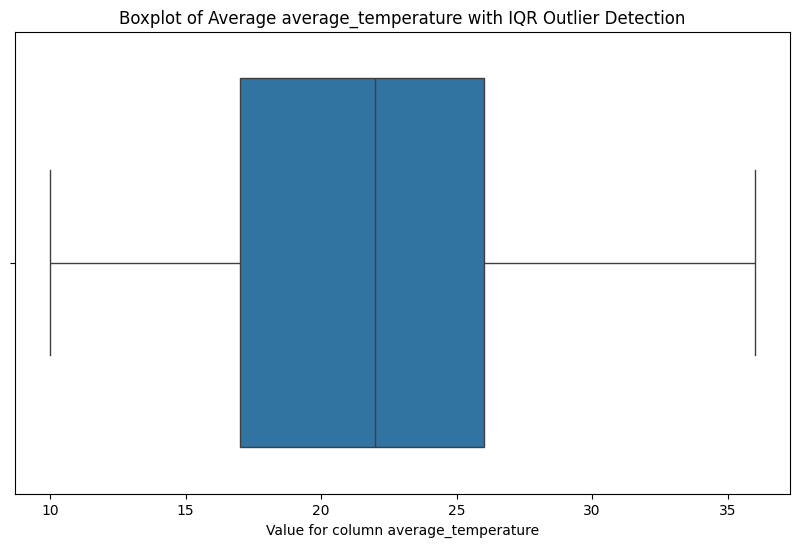

Number of outliers: 81960


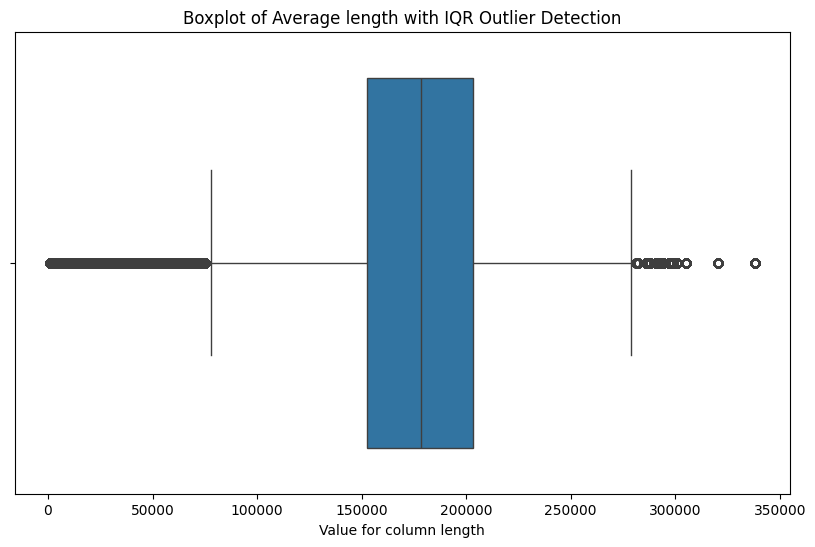

                                _url                        name  points  \
426  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
427  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
428  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
429  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
430  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
431  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
432  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
433  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
434  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
435  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   

     uci_points  length  climb_total  profile  startlist_quality  \
426         NaN  8100.0          NaN      NaN                804   
427         NaN  8100.0    

In [ ]:
outliers = iqr(df_races, "average_temperature")

outliers = iqr(df_races, 'length')

# Print the first 10 outliers since we actually HAVE outliers here...
print(outliers.head(10))

### <a id='toc3_2_2_'></a>[Histograms](#toc0_)

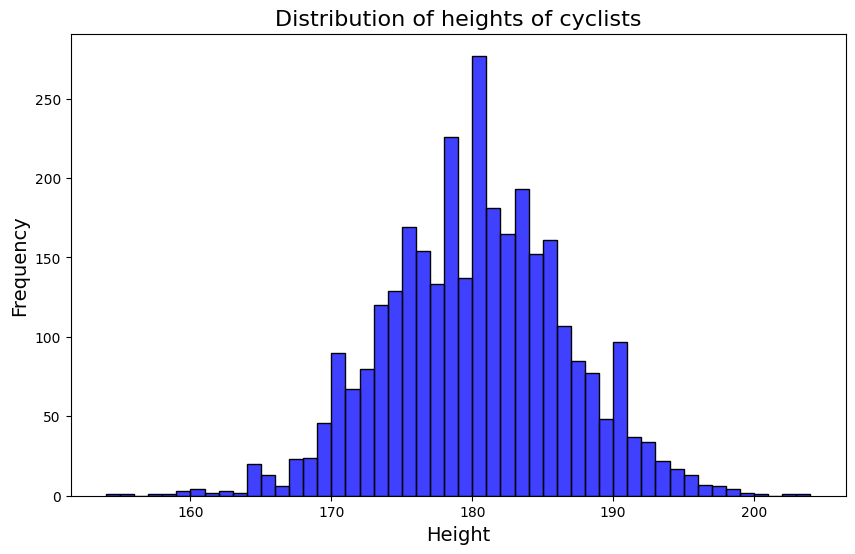

In [45]:
# Cyclist heights

plt.figure(figsize=(10, 6))

sns.histplot(df_cyclists['height'].dropna(), kde=False, bins=50, color='blue')

plt.title('Distribution of heights of cyclists', fontsize=16)
plt.xlabel('Height', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()


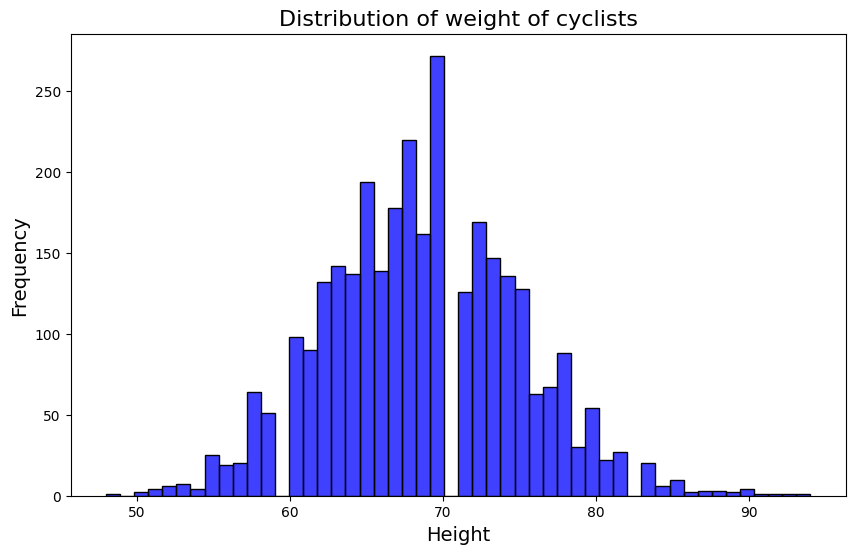

In [ ]:
# Cyclist weights

plt.figure(figsize=(10, 6))

sns.histplot(df_cyclists['weight'].dropna(), kde=False, bins=50, color='blue')

plt.title('Distribution of weight of cyclists', fontsize=16)
plt.xlabel('Height', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

# <a id='toc4_'></a>[Task 2: Data Transformation](#toc0_)